# **Custom Object Detection with Darknet YOLOv3.**


In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 14654 (delta 2), reused 0 (delta 0), pack-reused 14648
Receiving objects: 100% (14654/14654), 13.23 MiB | 25.33 MiB/s, done.
Resolving deltas: 100% (9970/9970), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

**Note:**
Once the runtime of the colab notebook is disconnected all the downloaded files and the github repositories will be lost. So when the files are downloaded for the first time it is better to save them in your drive and then mount the drive on the colab notebook.

In [ ]:
#mount your google drive on the notebook to save important files
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#  Download pretrained YOLOv3 weights
YOLOv3 has been trained already on the coco dataset which has 80 classes that it can predict. Let us grab these pretrained weights so that we can run YOLOv3 on these pretrained classes and get detections.

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-10-15 11:10:13--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   168KB/s    in 23m 42s 

2020-10-15 11:33:56 (170 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
#This step has to be done only for the first time
#Create a folder in your drive with yolov3
#Once the weights are downloaded save it to your drive
!cp /mydrive/yolov3/yolov3.weights ../

The yolov3.weights files has to be in the darknet directory.So once it is loaded from the google drive drag the weights file from your gdrive folder to darknet folder.

**Note: This is not required the first time when you download the weights with the wget command.**

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
%cd ..
%cd content/darknet

/
/content/darknet


In [ ]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

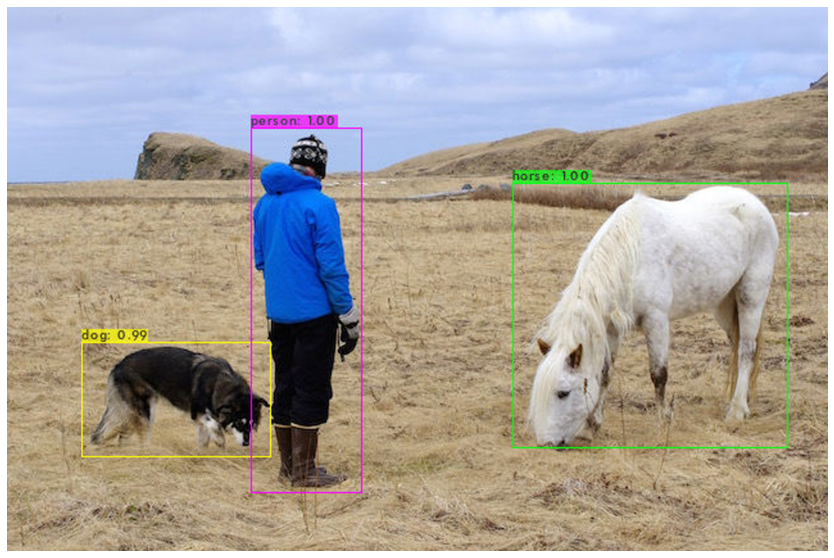

In [ ]:
# show image using our helper function
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

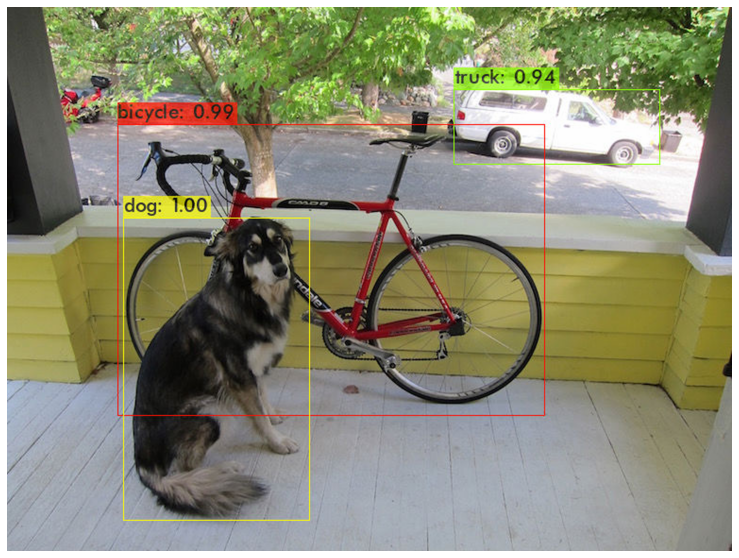

In [ ]:
# look we can run another detection!
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')

In [ ]:

# This stops 'Run all' at this cell by causing an error
assert False

In [ ]:
# upload an image to root directory (I uploaded an image called street.jpg, you can upload anything)
%cd ..
upload()

In [ ]:
# make sure you are in the darknet folder to run the detections command!
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights ../street.jpg
imShow('predictions.jpg')

In [ ]:
#mount your google drive on the notebook to save important files
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'Colab Notebooks'       pd.gdoc		      street.jpg
 detection1.jpg         PY3		     'Untitled spreadsheet (1).gsheet'
 DL		        result.csv	     'Untitled spreadsheet.gsheet'
'Getting started.pdf'   result.gsheet	     'Yagnesh Gotad_resume.gdoc'
'hsc (1).pdf'	       "Share 'pdppt.pptx'"   yolov3
 hsc.pdf	       'spit_2sem (1).pdf'
 images		        spit_2sem.pdf


[Errno 20] Not a directory: 'darknet'
/content/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 S

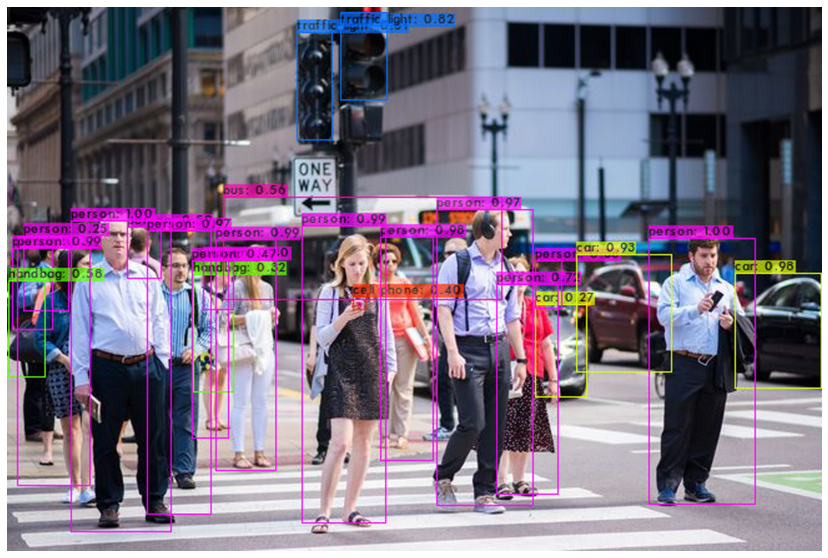

In [ ]:
# run darknet command with google drive image (my image path is /images/plane.jpg)
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/street.jpg
imShow('predictions.jpg')

In [ ]:
# LOCAL MACHINE DOWNLOAD
# if you get an error first run then run it again and it should work
download('predictions.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# GOOGLE DRIVE DOWNLOAD
# note that I can change what the image name is saved as (I am saving it as detection1.jpg)
!cp predictions.jpg /mydrive/detection1.jpg

# Train your YOLOv3 Custom Object Detector

**Gathering and Labeling a Custom Dataset**

In order to create a custom object detector you need a good dataset of images and labels so that the detector can be efficiently trained to detect objects.

This can be done through https://storage.googleapis.com/openimages/web/index.html

1. Open the above link.

2. Select Explore.

3. Select Segmentation as Detection and the explore the various classes and images present.

We will be using the OIDv4 ToolKit repository to downlaod the images from the above link.

1. Create a folder where you want to store the images.

2. Open your CMD or shell and go to the folder which you have created above.

3. Clone this repository--> git clone https://github.com/EscVM/OIDv4_ToolKit.git

4. cd into the OIDv4_ToolKit folder.

5. Type pip3 install -r requirements.txt

6. To download the dataset type(You may change Apple Orange to the classes you want, include spaces in between the names of **different classes**)
python3 main.py downloader --classes Apple Orange --type_csv validation

The above command will download the classes in different folders.
To download multiclasses in the same folder user the below command.
**For downloading a class with space in it's name include an underscore inbetween eg. write Bicycle_Helmet or Bell_Pepper**

7. python3 main.py downloader --classes Apple Orange --type_csv train --limit 400 --multiclasses 1

8. Go back to the OIDv4_ToolKit directory open the classes.txt file and the write the nanmes of the classes downloaded one on a line.

9. Go back to cmd and type--> python convert_annotations.py

**Uploading the dataset to your Drive**

1. Go to OIDv4_ToolKit-->OID-->Dataset-->Train and create a zip file of the folder in which all the images are present.

2. Upload the zip foes to your drive.

3. Run the below commands.

Check this repo--> https://github.com/theAIGuysCode/OIDv4_ToolKit

Follow the video for detailed understanding --> https://youtu.be/_4A9inxGqRM

In [ ]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/yolov3

all.zip  darknet53.conv.74  obj.data   obj.zip
backup	 generate_train.py  obj.names  yolov3_custom2.cfg


In [ ]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolov3/all.zip ../

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
#all.zip will be changed to the name of your zip folder
!unzip ../all.zip -d data/

Archive:  ../all.zip
  inflating: data/all/00013bb4b9ddfbab.jpg  
  inflating: data/all/00013bb4b9ddfbab.txt  
  inflating: data/all/0006124f7e35107e.jpg  
  inflating: data/all/0006124f7e35107e.txt  
  inflating: data/all/000d9c59687b509b.jpg  
  inflating: data/all/000d9c59687b509b.txt  
  inflating: data/all/0018c5388922350a.jpg  
  inflating: data/all/0018c5388922350a.txt  
  inflating: data/all/0022d08b808c7af6.jpg  
  inflating: data/all/0022d08b808c7af6.txt  
  inflating: data/all/00257455a1e5accc.jpg  
  inflating: data/all/00257455a1e5accc.txt  
  inflating: data/all/002973443937b47f.jpg  
  inflating: data/all/002973443937b47f.txt  
  inflating: data/all/00316e8bc3ecc649.jpg  
  inflating: data/all/00316e8bc3ecc649.txt  
  inflating: data/all/0031d1537b2e3dd6.jpg  
  inflating: data/all/0031d1537b2e3dd6.txt  
  inflating: data/all/00341c3c5825fc7e.jpg  
  inflating: data/all/00341c3c5825fc7e.txt  
  inflating: data/all/0035d941e53f36d8.jpg  
  inflating: data/all/0035d941e53f

In [ ]:
# download cfg to google drive and change its name
#uncomment to download
#!cp cfg/yolov3.cfg /mydrive/yolov3/yolov3_custom2.cfg

In [ ]:
# to download to local machine (change its name to yolov3_custom.cfg(or anyname.cfg) once you download)
download('cfg/yolov3.cfg')

If you save the file as anyname.cfg then replace the yolo3_custom2.cfg in the notebook with anyname.cfg

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3/yolov3_custom2.cfg ./cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd .. 

In your drive open the cfg file which you just saved above.
1. Comment lines 3 and 4 

2. Uncomment lines 5 and 6

3. On line 20 change max_batches = (no_of_classes you are training)*2000 
for 4 classes it'll be 4*2000

4. On line 22 steps=(80% of max_batches),(90% of max_batches)
for 4 classes it'll be steps=6400,7200

5. Ctrl+F search for yolo 

6. In the **yolo layer change classes to the number of which your are training** and in the **convolutional layer just above it change the filter to (no_classes +5)*3**

7. Repeat step 6 and 7 for all occurences of yolo layer and the convolutional layer just above it


## Create files named obj.names and obj.data 
Create a new file within a code or text editor in your drive called **obj.names** and you will make this file exactly the same as your classes.txt in the dataset generation step.


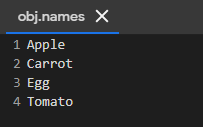

You will also create a **obj.data** file and fill it in like this (change your number of classes accordingly, as well as your backup location)

This backup path is where we will save the weights to of our model throughout training. Create a backup folder in your google drive and put its correct path in this file.

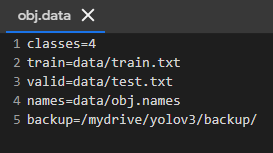


In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd .. 

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/yolov3/generate_train.py ./

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()


Now we simply run the python script to do all the work for us.

In [ ]:
!python generate_train.py

In [ ]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     dog.jpg	 horses.jpg		   obj.data	     scream.jpg
all	    eagle.jpg	 imagenet.labels.list	   obj.names	     train.txt
coco9k.map  giraffe.jpg  imagenet.shortnames.list  openimages.names  voc.names
coco.names  goal.txt	 labels			   person.jpg


If everything went as planned double click on **train.txt** on the left side File Explorer and it should look like this.
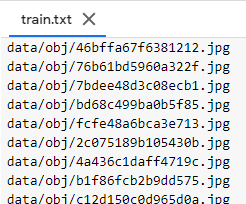

It will contain one line for each training image path.

# Download pre-trained weights for the convolutional layers.
This step downloads the weights for the convolutional layers of the YOLOv3 network. By using these weights it helps your custom object detector to be way more accurate and not have to train as long. You don't have to use these weights but trust me it will help your modle converge and be accurate way faster. USE IT!

In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2020-10-15 11:36:16--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   174KB/s    in 14m 36s 

2020-10-15 11:50:53 (181 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
#do this only for the first time you download using wget
#!cp darknet53.conv.74 /mydrive/yolov3
!cp /mydrive/yolov3/darknet53.conv.74 ../

**Note:** If you have already downloaded the darknet53.conv.74 and saved it to your drive just drag this file from the mounted gdrive folder to darknet folder.

In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom2.cfg darknet53.conv.74 -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_custom2
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outp

You can observe a chart of how your model did throughout the training process by running the below command. It shows a chart of your average loss vs. iterations. For your model to be 'accurate' you would aim for a loss under 2.

In [ ]:
imShow('chart.png')

In [ ]:

!./darknet detector train data/obj.data cfg/yolov3_custom2.cfg /mydrive/yolov3/backup/yolov3_custom2_last.weights -dont_show

Streaming output truncated to the last 5000 lines.

 7926: 0.362373, 0.351814 avg loss, 0.000010 rate, 5.704574 seconds, 507264 images, 0.192689 hours left
Loaded: 0.000036 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.812575, GIOU: 0.806142), Class: 0.999506, Obj: 0.789425, No Obj: 0.006744, .5R: 1.000000, .75R: 0.750000, count: 16, class_loss = 0.883809, iou_loss = 0.657576, total_loss = 1.541385 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000010, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000039, iou_loss = 0.000000, total_loss = 0.000039 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000000, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 380176, rewritten_bbox = 0.354310 % 
v3 (

#  Run Your Custom Object Detector!!!


In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom2.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom2.cfg
%cd ..


/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x

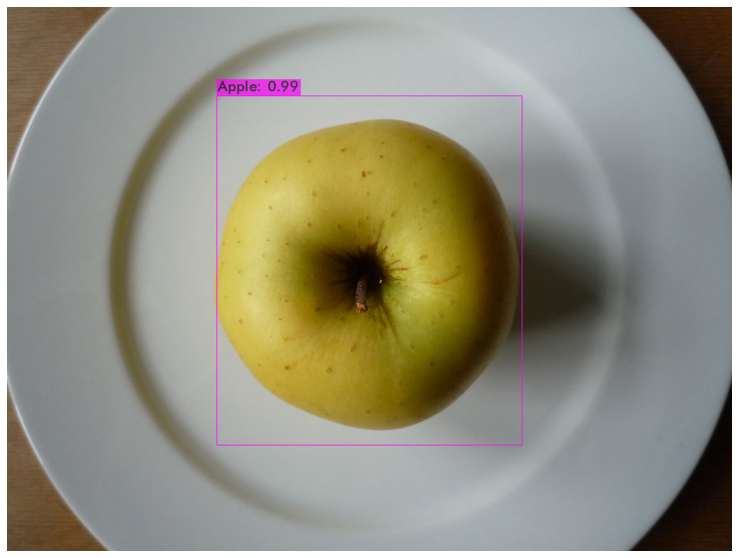

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom2.cfg /mydrive/yolov3/backup/yolov3_custom2_last.weights  /mydrive/images/greenapp.jpg -ext_output > op.txt #-thresh 0.3
imShow('predictions.jpg')

The above command saves the output of your predictions in a file named op.txt (present in darknet folder).

To save the output of the prediction in a offline file follow the below code.


In [ ]:

with open("op.txt") as f:
    with open("out.txt", "a") as f1:
        for line in f:
            f1.write(line)
download('out.txt')

Now the predictions will be present in the downloaded file named out.txt 

This youtube channel has a lot of yolo detection videos along with custom object detector .Do check!!
 [https://www.youtube.com/channel/UCrydcKaojc44XnuXrfhlV8Q?sub_confirmation=1](https://www.youtube.com/channel/UCrydcKaojc44XnuXrfhlV8Q?sub_confirmation=1)